In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_companies = "/Users/aamruth/Downloads/D1/companies.csv"
url_rounds = "/Users/aamruth/Downloads/D1/rounds.csv"
url_acquisitions = "/Users/aamruth/Downloads/D1/acquisitions.csv"

data_companies = pd.read_csv(url_companies, encoding='latin1')
data_rounds = pd.read_csv(url_rounds, encoding='latin1')
data_acquisitions = pd.read_csv(url_acquisitions, encoding='latin1')

pd.set_option("display.max_columns", None)

In [3]:
data_companies

permalink  \
0                                    /organization/-fame   
1                                 /organization/-qounter   
2                    /organization/-the-one-of-them-inc-   
3                                  /organization/0-6-com   
4                         /organization/004-technologies   
...                                                  ...   
66363  /organization/zznode-science-and-technology-co...   
66364                          /organization/zzzzapp-com   
66365                               /organization/Ãeron   
66366                             /organization/Ãasys-2   
66367  /organization/Ä°novatiff-reklam-ve-tanÄ±tÄ±m-h...   

                                                name  \
0                                              #fame   
1                                           :Qounter   
2                             (THE) ONE of THEM,Inc.   
3                                            0-6.com   
4                                   004 Technologies   
...                                              ...   
66363                  ZZNode Science and Technology   
66364                          Zzzzapp Wireless ltd.   
66365                                         ÃERON   
66366                                         Ãasys   
66367  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic   

                            homepage_url  \
0                     http://livfame.com   
1                 http://www.qounter.com   
2                    http://oneofthem.jp   
3                     http://www.0-6.com   
4      http://004gmbh.de/en/004-interact   
...                                  ...   
66363              http://www.zznode.com   
66364             http://www.zzzzapp.com   
66365               http://www.aeron.hu/   
66366               http://www.oasys.io/   
66367               http://inovatiff.com   

                                           category_list funding_total_usd  \
0                                                  Media          10000000   
1      Application Platforms|Real Time|Social Network...            700000   
2                                      Apps|Games|Mobile           3406878   
3                                            Curated Web           2000000   
4                                               Software                 -   
...                                                  ...               ...   
66363                                Enterprise Software           1587301   
66364        Advertising|Mobile|Web Development|Wireless            114304   
66365                                                NaN                 -   
66366  Consumer Electronics|Internet of Things|Teleco...             18192   
66367                 Consumer Goods|E-Commerce|Internet             14851   

          status country_code state_code                 region  \
0      operating          IND         16                 Mumbai   
1      operating          USA         DE             DE - Other   
2      operating          NaN        NaN                    NaN   
3      operating          CHN         22                Beijing   
4      operating          USA         IL  Springfield, Illinois   
...          ...          ...        ...                    ...   
66363  operating          CHN         22                Beijing   
66364  operating          HRV         15                  Split   
66365  operating          NaN        NaN                    NaN   
66366  operating          USA         CA            SF Bay Area   
66367  operating          NaN        NaN                    NaN   

                city  funding_rounds  founded_at first_funding_at  \
0             Mumbai               1         NaN       2015-01-05   
1      Delaware City               2  2014-09-04       2014-03-01   
2                NaN               1         NaN       2014-01-30   
3            Beijing               1  2007-01-01       2008-03-19   
4          Champaign               1 

In [4]:
data_companies.count()

permalink            66368
name                 66367
homepage_url         61310
category_list        63220
funding_total_usd    66368
status               66368
country_code         59410
state_code           57821
region               58338
city                 58340
funding_rounds       66368
founded_at           51147
first_funding_at     66344
last_funding_at      66368
dtype: int64

In [5]:
data_companies.nunique()

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

In [6]:
data_companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [7]:
data_companies.isnull().sum().sort_values(ascending=False) 


founded_at           15221
state_code            8547
region                8030
city                  8028
country_code          6958
homepage_url          5058
category_list         3148
first_funding_at        24
name                     1
permalink                0
funding_total_usd        0
status                   0
funding_rounds           0
last_funding_at          0
dtype: int64

In [8]:
data_companies.isnull().sum().sort_values(ascending=False)/len(data_companies)

founded_at           0.229342
state_code           0.128782
region               0.120992
city                 0.120962
country_code         0.104840
homepage_url         0.076211
category_list        0.047432
first_funding_at     0.000362
name                 0.000015
permalink            0.000000
funding_total_usd    0.000000
status               0.000000
funding_rounds       0.000000
last_funding_at      0.000000
dtype: float64

In [9]:
data_companies.country_code.replace(np.nan, "Other", inplace=True)
data_companies.category_list.replace(np.nan, "Other", inplace=True)
data_companies['founded_at'].fillna(data_companies['first_funding_at'], inplace=True)

columns_to_drop_company = ['state_code', 'region', 'city']
data_companies.drop(columns=columns_to_drop_company, inplace=True)

In [10]:
data_companies.isnull().sum().sort_values(ascending=False) 

homepage_url         5058
first_funding_at       24
founded_at              3
name                    1
permalink               0
category_list           0
funding_total_usd       0
status                  0
country_code            0
funding_rounds          0
last_funding_at         0
dtype: int64

In [11]:
data_rounds.isnull().sum().sort_values(ascending=False) 

funding_round_code         83809
raised_amount_usd          19990
company_state_code         10946
company_region             10167
company_city               10164
company_country_code        8678
company_category_list       3410
company_name                   1
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
dtype: int64

In [12]:
data_rounds

company_permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                               /organization/Ãeron   
114947                             /organization/Ãasys-2   
114948  /organization/Ä°novatiff-reklam-ve-tanÄ±tÄ±m-h...   

                                         company_name  \
0                                               #fame   
1                                            :Qounter   
2                                            :Qounter   
3                              (THE) ONE of THEM,Inc.   
4                                             0-6.com   
...                                               ...   
114944                          Zzzzapp Wireless ltd.   
114945                          Zzzzapp Wireless ltd.   
114946                                         ÃERON   
114947                                         Ãasys   
114948  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic   

                                    company_category_list  \
0                                                   Media   
1       Application Platforms|Real Time|Social Network...   
2       Application Platforms|Real Time|Social Network...   
3                                       Apps|Games|Mobile   
4                                             Curated Web   
...                                                   ...   
114944        Advertising|Mobile|Web Development|Wireless   
114945        Advertising|Mobile|Web Development|Wireless   
114946                                                NaN   
114947  Consumer Electronics|Internet of Things|Teleco...   
114948                 Consumer Goods|E-Commerce|Internet   

       company_country_code company_state_code company_region   company_city  \
0                       IND                 16         Mumbai         Mumbai   
1                       USA                 DE     DE - Other  Delaware City   
2                       USA                 DE     DE - Other  Delaware City   
3                       NaN                NaN            NaN            NaN   
4                       CHN                 22        Beijing        Beijing   
...                     ...                ...            ...            ...   
114944                  HRV                 15          Split          Split   
114945                  HRV                 15          Split          Split   
114946                  NaN                NaN            NaN            NaN   
114947                  USA                 CA    SF Bay Area  San Francisco   
114948                  NaN                NaN            NaN            NaN   

                                funding_round_permalink funding_round_type  \
0       /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1       /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2       /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3       /funding-round/650b8f704416801069bb178a1418776b            venture   
4       /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
...                                                 ...                ...   
114944  /funding-round/8f6d25b8ee4199e586484d817bceda05   convertible_note   
114945  /funding-round/ff1aa06ed5da186c84f101549035d4ae               seed   
114946  /funding-round/59f4dce44723b794f21ded3daed6e4fe            venture   
114947  /funding-round/35f09d0794651719b02bbfd859ba9ff5               seed   
114948  /funding-round/af942869878d2cd788ef5189b435ebc4              g

In [13]:
data_rounds.isnull().sum().sort_values(ascending=False) 


funding_round_code         83809
raised_amount_usd          19990
company_state_code         10946
company_region             10167
company_city               10164
company_country_code        8678
company_category_list       3410
company_name                   1
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
dtype: int64

In [14]:
data_rounds.isnull().sum().sort_values(ascending=False)/len(data_rounds)

funding_round_code         0.729097
raised_amount_usd          0.173903
company_state_code         0.095225
company_region             0.088448
company_city               0.088422
company_country_code       0.075494
company_category_list      0.029665
company_name               0.000009
company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
dtype: float64

In [15]:
data_rounds.funding_round_code.value_counts()

A    14747
B     8713
C     4476
D     2025
E      811
F      283
G       73
H       12
Name: funding_round_code, dtype: int64

In [16]:
data_rounds.funding_round_code.replace(np.nan, "NoCode", inplace=True)
data_rounds.raised_amount_usd.replace(np.nan, 0.00, inplace=True)
data_rounds.company_country_code.replace(np.nan, "Other", inplace=True)
data_rounds.company_category_list.replace(np.nan, "Other", inplace=True)

columns_to_drop = ['company_state_code', 'company_region', 'company_city']
data_rounds.drop(columns=columns_to_drop, inplace=True)


In [17]:
data_rounds.funding_round_code.value_counts()

NoCode    83809
A         14747
B          8713
C          4476
D          2025
E           811
F           283
G            73
H            12
Name: funding_round_code, dtype: int64

In [18]:
data_rounds.isnull().sum().sort_values(ascending=False) 


company_name               1
company_permalink          0
company_category_list      0
company_country_code       0
funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [19]:
data_rounds.count()

company_permalink          114949
company_name               114948
company_category_list      114949
company_country_code       114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code         114949
funded_at                  114949
raised_amount_usd          114949
dtype: int64

In [20]:
data_rounds.nunique()

company_permalink           66368
company_name                66102
company_category_list       27297
company_country_code          138
funding_round_permalink    114949
funding_round_type             14
funding_round_code              9
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [21]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [22]:
import re 
data_rounds['Industry_Group'] = pd.np.where(data_rounds.company_category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(data_rounds.company_category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/3674608679.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_rounds['Industry_Group'] = pd.np.where(data_rounds.company_category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/3674608679.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/3674608679.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/3674608679.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/3674608679.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/3674608679.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Informatio

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/3674608679.py:48: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_rounds.company_category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))


In [23]:
import re 
data_companies['Industry_Group'] = pd.np.where(data_companies.category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(data_companies.category_list.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(data_companies.category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/378594232.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_companies['Industry_Group'] = pd.np.where(data_companies.category_list.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/378594232.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/378594232.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_companies.category_list.str.contains('|'.join(software), flag

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/378594232.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/378594232.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data_companies.category_list.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/378594232.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology",
/va

/var/folders/r8/6l9smpcs71zdwhw9ylnqkvzm0000gn/T/ipykernel_75297/378594232.py:48: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data_companies.category_list.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))


In [24]:
data_companies

permalink  \
0                                    /organization/-fame   
1                                 /organization/-qounter   
2                    /organization/-the-one-of-them-inc-   
3                                  /organization/0-6-com   
4                         /organization/004-technologies   
...                                                  ...   
66363  /organization/zznode-science-and-technology-co...   
66364                          /organization/zzzzapp-com   
66365                               /organization/Ãeron   
66366                             /organization/Ãasys-2   
66367  /organization/Ä°novatiff-reklam-ve-tanÄ±tÄ±m-h...   

                                                name  \
0                                              #fame   
1                                           :Qounter   
2                             (THE) ONE of THEM,Inc.   
3                                            0-6.com   
4                                   004 Technologies   
...                                              ...   
66363                  ZZNode Science and Technology   
66364                          Zzzzapp Wireless ltd.   
66365                                         ÃERON   
66366                                         Ãasys   
66367  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic   

                            homepage_url  \
0                     http://livfame.com   
1                 http://www.qounter.com   
2                    http://oneofthem.jp   
3                     http://www.0-6.com   
4      http://004gmbh.de/en/004-interact   
...                                  ...   
66363              http://www.zznode.com   
66364             http://www.zzzzapp.com   
66365               http://www.aeron.hu/   
66366               http://www.oasys.io/   
66367               http://inovatiff.com   

                                           category_list funding_total_usd  \
0                                                  Media          10000000   
1      Application Platforms|Real Time|Social Network...            700000   
2                                      Apps|Games|Mobile           3406878   
3                                            Curated Web           2000000   
4                                               Software                 -   
...                                                  ...               ...   
66363                                Enterprise Software           1587301   
66364        Advertising|Mobile|Web Development|Wireless            114304   
66365                                              Other                 -   
66366  Consumer Electronics|Internet of Things|Teleco...             18192   
66367                 Consumer Goods|E-Commerce|Internet             14851   

          status country_code  funding_rounds  founded_at first_funding_at  \
0      operating          IND               1  2015-01-05       2015-01-05   
1      operating          USA               2  2014-09-04       2014-03-01   
2      operating        Other               1  2014-01-30       2014-01-30   
3      operating          CHN               1  2007-01-01       2008-03-19   
4      operating          USA               1  2010-01-01       2014-07-24   
...          ...          ...             ...         ...              ...   
66363  operating          CHN               1  2012-04-01       2012-04-01   
66364  operating          HRV               4  2012-05-13       2011-11-01   
66365  operating        Other               1  2011-01-01       2014-08-01   
66366  operating          USA               1  2014-01-01       2015-01-01   
66367  operating        Other               1  2013-10-01       2013-10-01   

      last_funding_at           Industry_Group  
0          2015-01-05  Media and Entertainment  
1          2014-10-14                     Apps  
2          2014-01-30                 Software  
3          2008-03-19        Internet Services  
4    

In [25]:
data_companies.isnull().sum().sort_values(ascending=False) 


homepage_url         5058
first_funding_at       24
founded_at              3
name                    1
permalink               0
category_list           0
funding_total_usd       0
status                  0
country_code            0
funding_rounds          0
last_funding_at         0
Industry_Group          0
dtype: int64

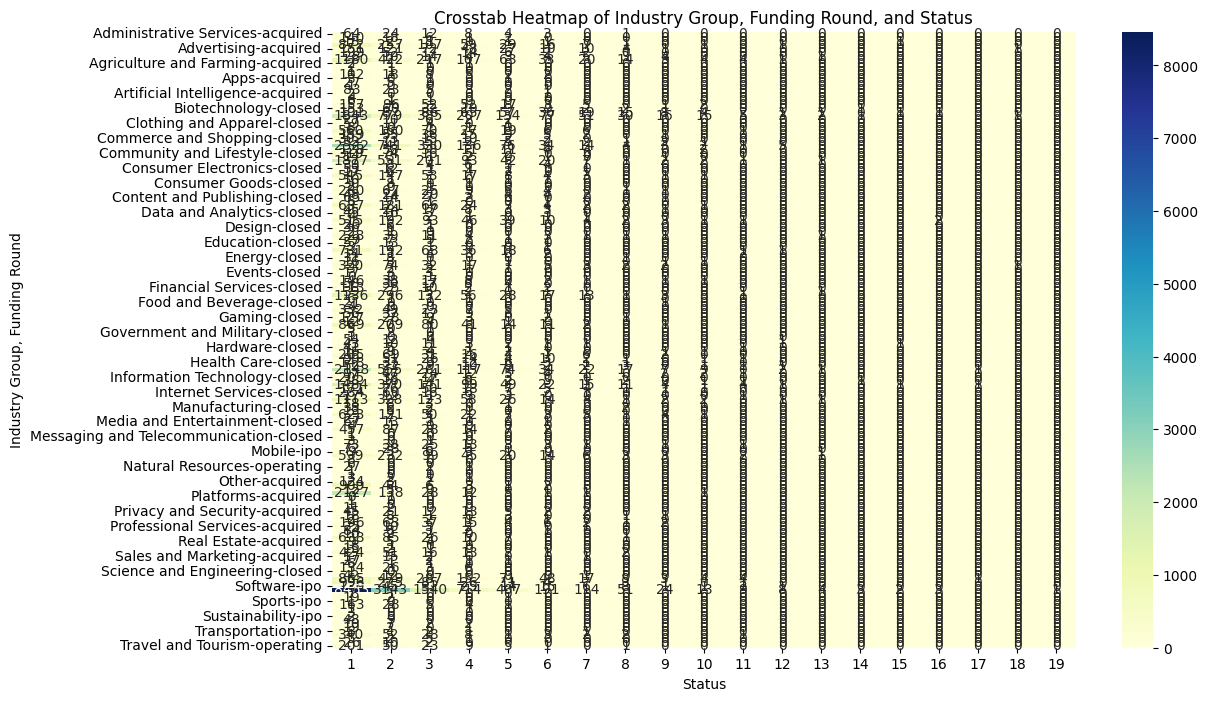

In [26]:
cross_tab = pd.crosstab(index=[data_companies['Industry_Group'], data_companies['status']], columns=data_companies['funding_rounds'])

# Set up the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Crosstab Heatmap of Industry Group, Funding Round, and Status')
plt.xlabel('Status')
plt.ylabel('Industry Group, Funding Round')

plt.show()

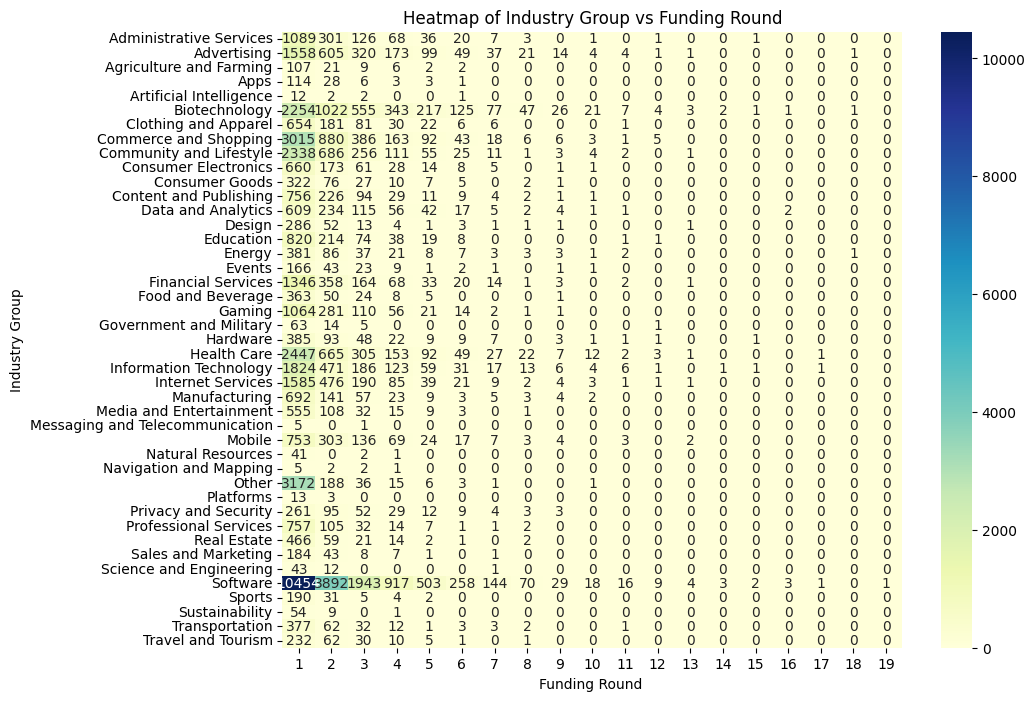

In [27]:
# Create a cross-tabulation between Industry_Group and funding_round_type
cross_tab = pd.crosstab(data_companies['Industry_Group'], data_companies['funding_rounds'])

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Industry Group vs Funding Round')
plt.xlabel('Funding Round ')
plt.ylabel('Industry Group')

plt.show()

In [28]:
data_rounds.head(5)

company_permalink            company_name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2               /organization/-qounter                :Qounter   
3  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
4                /organization/0-6-com                 0-6.com   

                               company_category_list company_country_code  \
0                                              Media                  IND   
1  Application Platforms|Real Time|Social Network...                  USA   
2  Application Platforms|Real Time|Social Network...                  USA   
3                                  Apps|Games|Mobile                Other   
4                                        Curated Web                  CHN   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd           Industry_Group  
0                  B  2015-01-05         10000000.0  Media and Entertainment  
1                  A  2014-10-14                0.0                     Apps  
2             NoCode  2014-03-01           700000.0                     Apps  
3                  B  2014-01-30          3406878.0                 Software  
4                  A  2008-03-19          2000000.0        Internet Services

In [29]:
data_rounds.columns

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_country_code', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd',
       'Industry_Group'],
      dtype='object')

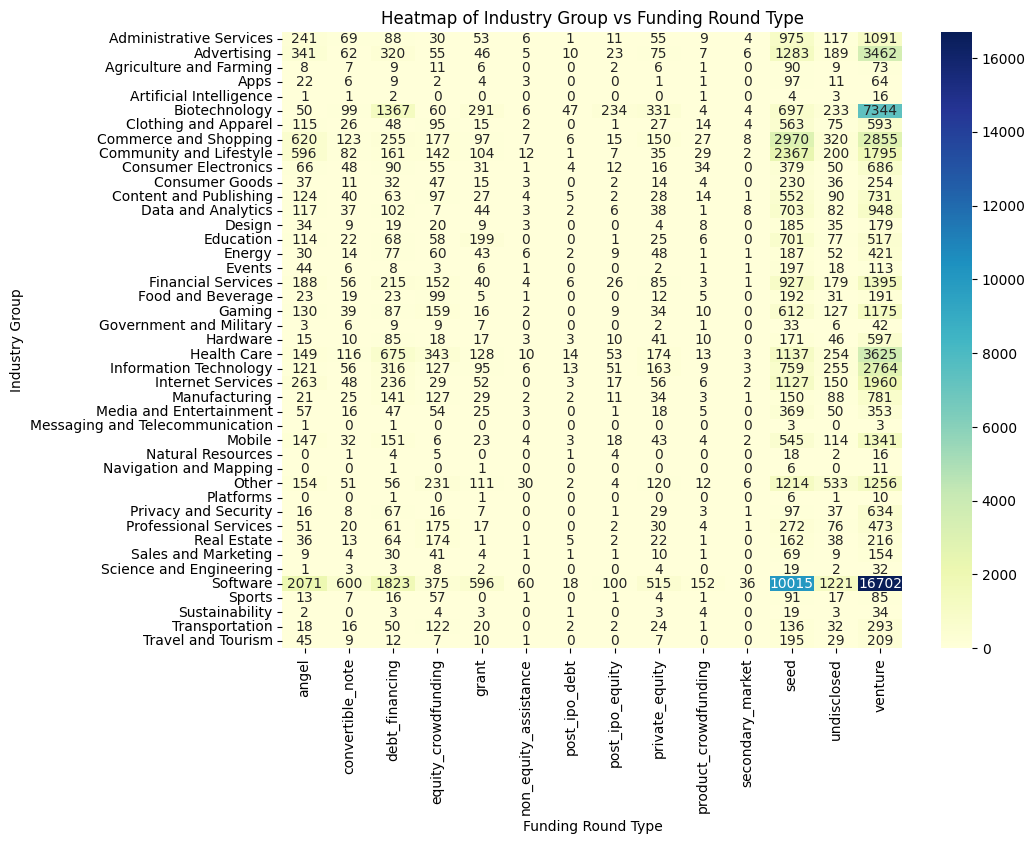

In [30]:
# Create a cross-tabulation between Industry_Group and funding_round_type
cross_tab = pd.crosstab(data_rounds['Industry_Group'], data_rounds['funding_round_type'])

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Industry Group vs Funding Round Type')
plt.xlabel('Funding Round Type')
plt.ylabel('Industry Group')

plt.show()

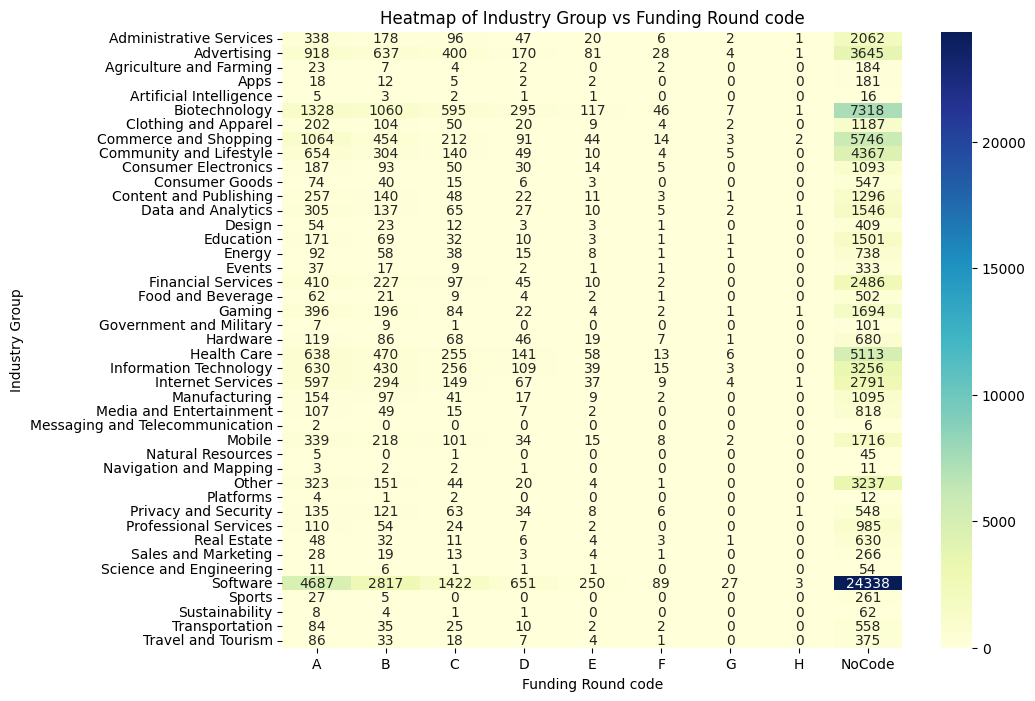

In [31]:
# Create a cross-tabulation between Industry_Group and funding_round_type
cross_tab = pd.crosstab(data_rounds['Industry_Group'], data_rounds['funding_round_code'])

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Industry Group vs Funding Round code')
plt.xlabel('Funding Round code')
plt.ylabel('Industry Group')

plt.show()

In [32]:
data_rounds.nunique()

company_permalink           66368
company_name                66102
company_category_list       27297
company_country_code          138
funding_round_permalink    114949
funding_round_type             14
funding_round_code              9
funded_at                    5033
raised_amount_usd           22095
Industry_Group                 43
dtype: int64

In [33]:
merged_data = pd.merge(data_rounds, data_companies, left_on='company_permalink', right_on='permalink', how='left')
merged_data.head(5)

company_permalink            company_name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2               /organization/-qounter                :Qounter   
3  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
4                /organization/0-6-com                 0-6.com   

                               company_category_list company_country_code  \
0                                              Media                  IND   
1  Application Platforms|Real Time|Social Network...                  USA   
2  Application Platforms|Real Time|Social Network...                  USA   
3                                  Apps|Games|Mobile                Other   
4                                        Curated Web                  CHN   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd         Industry_Group_x  \
0                  B  2015-01-05         10000000.0  Media and Entertainment   
1                  A  2014-10-14                0.0                     Apps   
2             NoCode  2014-03-01           700000.0                     Apps   
3                  B  2014-01-30          3406878.0                 Software   
4                  A  2008-03-19          2000000.0        Internet Services   

                             permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2               /organization/-qounter                :Qounter   
3  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
4                /organization/0-6-com                 0-6.com   

             homepage_url                                      category_list  \
0      http://livfame.com                                              Media   
1  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
2  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
3     http://oneofthem.jp                                  Apps|Games|Mobile   
4      http://www.0-6.com                                        Curated Web   

  funding_total_usd     status country_code  funding_rounds  founded_at  \
0          10000000  operating          IND               1  2015-01-05   
1            700000  operating          USA               2  2014-09-04   
2            700000  operating          USA               2  2014-09-04   
3           3406878  operating        Other               1  2014-01-30   
4           2000000  operating          CHN               1  2007-01-01   

  first_funding_at last_funding_at         Industry_Group_y  
0       2015-01-05      2015-01-05  Media and Entertainment  
1       2014-03-01      2014-10-14                     Apps  
2       2014-03-01      2014-10-14                     Apps  
3       2014-01-30      2014-01-30                 Software  
4       2008-03-19      2008-03-19        Internet Services

In [34]:
columns_to_drop = ['permalink', 'name', 'category_list', 'funding_total_usd', 'country_code']
merged_data = merged_data.drop(columns=columns_to_drop)
merged_data

company_permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                               /organization/Ãeron   
114947                             /organization/Ãasys-2   
114948  /organization/Ä°novatiff-reklam-ve-tanÄ±tÄ±m-h...   

                                         company_name  \
0                                               #fame   
1                                            :Qounter   
2                                            :Qounter   
3                              (THE) ONE of THEM,Inc.   
4                                             0-6.com   
...                                               ...   
114944                          Zzzzapp Wireless ltd.   
114945                          Zzzzapp Wireless ltd.   
114946                                         ÃERON   
114947                                         Ãasys   
114948  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic   

                                    company_category_list  \
0                                                   Media   
1       Application Platforms|Real Time|Social Network...   
2       Application Platforms|Real Time|Social Network...   
3                                       Apps|Games|Mobile   
4                                             Curated Web   
...                                                   ...   
114944        Advertising|Mobile|Web Development|Wireless   
114945        Advertising|Mobile|Web Development|Wireless   
114946                                              Other   
114947  Consumer Electronics|Internet of Things|Teleco...   
114948                 Consumer Goods|E-Commerce|Internet   

       company_country_code                          funding_round_permalink  \
0                       IND  /funding-round/9a01d05418af9f794eebff7ace91f638   
1                       USA  /funding-round/22dacff496eb7acb2b901dec1dfe5633   
2                       USA  /funding-round/b44fbb94153f6cdef13083530bb48030   
3                     Other  /funding-round/650b8f704416801069bb178a1418776b   
4                       CHN  /funding-round/5727accaeaa57461bd22a9bdd945382d   
...                     ...                                              ...   
114944                  HRV  /funding-round/8f6d25b8ee4199e586484d817bceda05   
114945                  HRV  /funding-round/ff1aa06ed5da186c84f101549035d4ae   
114946                Other  /funding-round/59f4dce44723b794f21ded3daed6e4fe   
114947                  USA  /funding-round/35f09d0794651719b02bbfd859ba9ff5   
114948                Other  /funding-round/af942869878d2cd788ef5189b435ebc4   

       funding_round_type funding_round_code   funded_at  raised_amount_usd  \
0                 venture                  B  2015-01-05         10000000.0   
1                 venture                  A  2014-10-14                0.0   
2                    seed             NoCode  2014-03-01           700000.0   
3                 venture                  B  2014-01-30          3406878.0   
4                 venture                  A  2008-03-19          2000000.0   
...                   ...                ...         ...                ...   
114944   convertible_note             NoCode  2014-03-01            41313.0   
114945               seed             NoCode  2013-05-01            32842.0   
114946            venture                  A  2014-08-01                0.0   
114947               seed             NoCode  2015-01-01            18192.0   
114948              grant             NoCode  2013-10-01   

In [35]:
data_acquisitions

company_permalink  \
0                                   /organization/003-ru   
1                          /organization/0958572-b-c-ltd   
2                     /organization/1-800-communications   
3                           /organization/1-800-contacts   
4      /organization/1-844-446-4460-pogo-customer-ser...   
...                                                  ...   
18963                               /organization/zyrion   
18964                               /organization/zystor   
18965                          /organization/zytex-group   
18966                 /organization/âcompass-solutions   
18967                                      ns|Technology   

                                            company_name  \
0                                                 003.RU   
1                                      0958572 B.C. Ltd.   
2                                   1-800 Communications   
3                                         1-800 Contacts   
4      Games Support +1-800-311-5934 Pogo Games techn...   
...                                                  ...   
18963                                         Zyrion Inc   
18964                                             Zystor   
18965                                        Zytex group   
18966                              Nâcompass Solutions   
18967                                                USA   

                           company_category_list company_country_code  \
0      Consumer Electronics|Electronics|Internet                  RUS   
1                                            NaN                  NaN   
2                                            NaN                  USA   
3                          Consumer Goods|Retail                  USA   
4                                            NaN                  NaN   
...                                          ...                  ...   
18963                        Networking|Software                  USA   
18964                              Biotechnology                  USA   
18965                              Manufacturing                  IND   
18966                     Information Technology                  USA   
18967                                         CA          SF Bay Area   

      company_state_code  company_region company_city  \
0                     48          Moscow       Moscow   
1                    NaN             NaN          NaN   
2                     NY     Long Island   Hicksville   
3                     UT  Salt Lake City       Draper   
4                    NaN             NaN          NaN   
...                  ...             ...          ...   
18963                 CA     SF Bay Area    Sunnyvale   
18964                 WI       Milwaukee    Milwaukee   
18965                 16          Mumbai       Mumbai   
18966                 MN     Minneapolis  Maple Grove   
18967      San Francisco      2000-07-19      2000-07   

                                      acquirer_permalink  \
0                             /organization/media-saturn   
1      /organization/atlas-intellectual-property-mana...   
2                           /organization/carsdirect-com   
3                    /organization/thomas-h-lee-partners   
4      /organization/pogo-customer-service-number-1-8...   
...                                                  ...   
18963                               /organization/kaseya   
18964              /organization/biomarin-pharmaceutical   
18965                          /organization/brenntag-ag   
18966                /organization/alphapoint-technology   
18967                                            2000-Q3   

                                           acquirer_name  \
0                                           Media Saturn   
1             ATLAS Intellectual Property Management Co.   
2                                         CarsDirect.com   
3                                 Thomas H. Lee Partners   
4      Games S

In [85]:
data1 = merged_data
data1

company_permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                               /organization/Ãeron   
114947                             /organization/Ãasys-2   
114948  /organization/Ä°novatiff-reklam-ve-tanÄ±tÄ±m-h...   

                                         company_name  \
0                                               #fame   
1                                            :Qounter   
2                                            :Qounter   
3                              (THE) ONE of THEM,Inc.   
4                                             0-6.com   
...                                               ...   
114944                          Zzzzapp Wireless ltd.   
114945                          Zzzzapp Wireless ltd.   
114946                                         ÃERON   
114947                                         Ãasys   
114948  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic   

                                    company_category_list  \
0                                                   Media   
1       Application Platforms|Real Time|Social Network...   
2       Application Platforms|Real Time|Social Network...   
3                                       Apps|Games|Mobile   
4                                             Curated Web   
...                                                   ...   
114944        Advertising|Mobile|Web Development|Wireless   
114945        Advertising|Mobile|Web Development|Wireless   
114946                                              Other   
114947  Consumer Electronics|Internet of Things|Teleco...   
114948                 Consumer Goods|E-Commerce|Internet   

       company_country_code                          funding_round_permalink  \
0                       IND  /funding-round/9a01d05418af9f794eebff7ace91f638   
1                       USA  /funding-round/22dacff496eb7acb2b901dec1dfe5633   
2                       USA  /funding-round/b44fbb94153f6cdef13083530bb48030   
3                     Other  /funding-round/650b8f704416801069bb178a1418776b   
4                       CHN  /funding-round/5727accaeaa57461bd22a9bdd945382d   
...                     ...                                              ...   
114944                  HRV  /funding-round/8f6d25b8ee4199e586484d817bceda05   
114945                  HRV  /funding-round/ff1aa06ed5da186c84f101549035d4ae   
114946                Other  /funding-round/59f4dce44723b794f21ded3daed6e4fe   
114947                  USA  /funding-round/35f09d0794651719b02bbfd859ba9ff5   
114948                Other  /funding-round/af942869878d2cd788ef5189b435ebc4   

       funding_round_type funding_round_code   funded_at  raised_amount_usd  \
0                 venture                  B  2015-01-05         10000000.0   
1                 venture                  A  2014-10-14                0.0   
2                    seed             NoCode  2014-03-01           700000.0   
3                 venture                  B  2014-01-30          3406878.0   
4                 venture                  A  2008-03-19          2000000.0   
...                   ...                ...         ...                ...   
114944   convertible_note             NoCode  2014-03-01            41313.0   
114945               seed             NoCode  2013-05-01            32842.0   
114946            venture                  A  2014-08-01                0.0   
114947               seed             NoCode  2015-01-01            18192.0   
114948              grant             NoCode  2013-10-01   

In [86]:
data1.isin([0]).sum()

company_permalink              0
company_name                   0
company_category_list          0
company_country_code           0
funding_round_permalink        0
funding_round_type             0
funding_round_code             0
funded_at                      0
raised_amount_usd          20405
Industry_Group_x               0
homepage_url                   0
status                         0
funding_rounds                 0
founded_at                     0
first_funding_at               0
last_funding_at                0
Industry_Group_y               0
dtype: int64

In [87]:
data1.nunique()

company_permalink           66368
company_name                66102
company_category_list       27297
company_country_code          138
funding_round_permalink    114949
funding_round_type             14
funding_round_code              9
funded_at                    5033
raised_amount_usd           22095
Industry_Group_x               43
homepage_url                61191
status                          4
funding_rounds                 19
founded_at                   4926
first_funding_at             4817
last_funding_at              4518
Industry_Group_y               43
dtype: int64

In [88]:
data1.count()

company_permalink          114949
company_name               114948
company_category_list      114949
company_country_code       114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code         114949
funded_at                  114949
raised_amount_usd          114949
Industry_Group_x           114949
homepage_url               108815
status                     114949
funding_rounds             114949
founded_at                 114944
first_funding_at           114901
last_funding_at            114949
Industry_Group_y           114949
dtype: int64

In [89]:
data1.isnull().sum().sort_values(ascending=False)/len(data)

homepage_url               211.517241
first_funding_at             1.655172
founded_at                   0.172414
company_name                 0.034483
company_permalink            0.000000
Industry_Group_x             0.000000
last_funding_at              0.000000
funding_rounds               0.000000
status                       0.000000
raised_amount_usd            0.000000
funded_at                    0.000000
funding_round_code           0.000000
funding_round_type           0.000000
funding_round_permalink      0.000000
company_country_code         0.000000
company_category_list        0.000000
Industry_Group_y             0.000000
dtype: float64

In [90]:
data1.isnull().sum().sort_values(ascending=False) 


homepage_url               6134
first_funding_at             48
founded_at                    5
company_name                  1
company_permalink             0
Industry_Group_x              0
last_funding_at               0
funding_rounds                0
status                        0
raised_amount_usd             0
funded_at                     0
funding_round_code            0
funding_round_type            0
funding_round_permalink       0
company_country_code          0
company_category_list         0
Industry_Group_y              0
dtype: int64

In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   company_name             114948 non-null  object 
 2   company_category_list    114949 non-null  object 
 3   company_country_code     114949 non-null  object 
 4   funding_round_permalink  114949 non-null  object 
 5   funding_round_type       114949 non-null  object 
 6   funding_round_code       114949 non-null  object 
 7   funded_at                114949 non-null  object 
 8   raised_amount_usd        114949 non-null  float64
 9   Industry_Group_x         114949 non-null  object 
 10  homepage_url             108815 non-null  object 
 11  status                   114949 non-null  object 
 12  funding_rounds           114949 non-null  int64  
 13  founded_at               114944 non-null  object 
 14  firs

In [92]:
columns_to_drop_merge = ['company_category_list', 'funding_round_permalink', 'Industry_Group_y','homepage_url',]
data1 = data1.drop(columns=columns_to_drop_merge)



In [93]:
data1


company_permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                               /organization/Ãeron   
114947                             /organization/Ãasys-2   
114948  /organization/Ä°novatiff-reklam-ve-tanÄ±tÄ±m-h...   

                                         company_name company_country_code  \
0                                               #fame                  IND   
1                                            :Qounter                  USA   
2                                            :Qounter                  USA   
3                              (THE) ONE of THEM,Inc.                Other   
4                                             0-6.com                  CHN   
...                                               ...                  ...   
114944                          Zzzzapp Wireless ltd.                  HRV   
114945                          Zzzzapp Wireless ltd.                  HRV   
114946                                         ÃERON                Other   
114947                                         Ãasys                  USA   
114948  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic                Other   

       funding_round_type funding_round_code   funded_at  raised_amount_usd  \
0                 venture                  B  2015-01-05         10000000.0   
1                 venture                  A  2014-10-14                0.0   
2                    seed             NoCode  2014-03-01           700000.0   
3                 venture                  B  2014-01-30          3406878.0   
4                 venture                  A  2008-03-19          2000000.0   
...                   ...                ...         ...                ...   
114944   convertible_note             NoCode  2014-03-01            41313.0   
114945               seed             NoCode  2013-05-01            32842.0   
114946            venture                  A  2014-08-01                0.0   
114947               seed             NoCode  2015-01-01            18192.0   
114948              grant             NoCode  2013-10-01            14851.0   

               Industry_Group_x     status  funding_rounds  founded_at  \
0       Media and Entertainment  operating               1  2015-01-05   
1                          Apps  operating               2  2014-09-04   
2                          Apps  operating               2  2014-09-04   
3                      Software  operating               1  2014-01-30   
4             Internet Services  operating               1  2007-01-01   
...                         ...        ...             ...         ...   
114944                 Software  operating               4  2012-05-13   
114945                 Software  operating               4  2012-05-13   
114946                    Other  operating               1  2011-01-01   
114947     Consumer Electronics  operating               1  2014-01-01   
114948    Commerce and Shopping  operating               1  2013-10-01   

       first_funding_at last_funding_at  
0            2015-01-05      2015-01-05  
1            2014-03-01      2014-10-14  
2            2014-03-01      2014-10-14  
3            2014-01-30      2014-01-30  
4            2008-03-19      2008-03-19  
...                 ...             ...  
114944       2011-11-01      2014-03-01  
114945       2011-11-01      2014-03-01  
114946       2014-08-01      2014-08-01  
114947       2015-01-01      2015-01-01  
114948       2013-10-01      2013-10-01  

[114949 rows x 13 columns]

In [94]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   company_permalink     114949 non-null  object 
 1   company_name          114948 non-null  object 
 2   company_country_code  114949 non-null  object 
 3   funding_round_type    114949 non-null  object 
 4   funding_round_code    114949 non-null  object 
 5   funded_at             114949 non-null  object 
 6   raised_amount_usd     114949 non-null  float64
 7   Industry_Group_x      114949 non-null  object 
 8   status                114949 non-null  object 
 9   funding_rounds        114949 non-null  int64  
 10  founded_at            114944 non-null  object 
 11  first_funding_at      114901 non-null  object 
 12  last_funding_at       114949 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.3+ MB


In [101]:
"""
data1.columns = data1.columns.str.replace(' ', '')
data1.columns = data1.columns.str.strip()
data1.columns = data1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

columns_to_convert = ['founded_at', 'first_funding_at', 'last_funding_at', 'funded_at']
data1[columns_to_convert] = data1[columns_to_convert].apply(pd.to_datetime, format='%y-%m-%d', errors='coerce')


data1
"""
data1.columns = data1.columns.str.replace(' ', '')
data1.columns = data1.columns.str.strip()
data1.columns = data1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
date_formats = {'founded_at': '%Y-%m-%d',
                'first_funding_at': '%Y-%m-%d',
                'last_funding_at': '%Y-%m-%d',
                'funded_at': '%Y-%m-%d'}
for column, format_str in date_formats.items():
    data1[column] = pd.to_datetime(data1[column], format=format_str, errors='coerce')
# Check for "NAT" values after conversion
nats_count = data1[columns_to_convert].isna().sum()
print(nats_count)

founded_at          0
first_funding_at    0
last_funding_at     0
funded_at           0
dtype: int64


In [102]:
data1.dropna(subset=columns_to_convert, inplace=True)

In [103]:
data1[data1['founded_at'].isna()]
data1.count()


company_permalink       114890
company_name            114889
company_country_code    114890
funding_round_type      114890
funding_round_code      114890
funded_at               114890
raised_amount_usd       114890
Industry_Group_x        114890
status                  114890
funding_rounds          114890
founded_at              114890
first_funding_at        114890
last_funding_at         114890
dtype: int64

In [104]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114890 entries, 0 to 114948
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_permalink     114890 non-null  object        
 1   company_name          114889 non-null  object        
 2   company_country_code  114890 non-null  object        
 3   funding_round_type    114890 non-null  object        
 4   funding_round_code    114890 non-null  object        
 5   funded_at             114890 non-null  datetime64[ns]
 6   raised_amount_usd     114890 non-null  float64       
 7   Industry_Group_x      114890 non-null  object        
 8   status                114890 non-null  object        
 9   funding_rounds        114890 non-null  int64         
 10  founded_at            114890 non-null  datetime64[ns]
 11  first_funding_at      114890 non-null  datetime64[ns]
 12  last_funding_at       114890 non-null  datetime64[ns]
dtyp

In [105]:
data1['time_between_founded_funded_at'] = (pd.to_datetime(data1['funded_at'], format='%m/%d/%y', errors="coerce") - pd.to_datetime(data1['founded_at'], errors="coerce")).dt.days

In [106]:
data1

company_permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                               /organization/Ãeron   
114947                             /organization/Ãasys-2   
114948  /organization/Ä°novatiff-reklam-ve-tanÄ±tÄ±m-h...   

                                         company_name company_country_code  \
0                                               #fame                  IND   
1                                            :Qounter                  USA   
2                                            :Qounter                  USA   
3                              (THE) ONE of THEM,Inc.                Other   
4                                             0-6.com                  CHN   
...                                               ...                  ...   
114944                          Zzzzapp Wireless ltd.                  HRV   
114945                          Zzzzapp Wireless ltd.                  HRV   
114946                                         ÃERON                Other   
114947                                         Ãasys                  USA   
114948  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic                Other   

       funding_round_type funding_round_code  funded_at  raised_amount_usd  \
0                 venture                  B 2015-01-05         10000000.0   
1                 venture                  A 2014-10-14                0.0   
2                    seed             NoCode 2014-03-01           700000.0   
3                 venture                  B 2014-01-30          3406878.0   
4                 venture                  A 2008-03-19          2000000.0   
...                   ...                ...        ...                ...   
114944   convertible_note             NoCode 2014-03-01            41313.0   
114945               seed             NoCode 2013-05-01            32842.0   
114946            venture                  A 2014-08-01                0.0   
114947               seed             NoCode 2015-01-01            18192.0   
114948              grant             NoCode 2013-10-01            14851.0   

               Industry_Group_x     status  funding_rounds founded_at  \
0       Media and Entertainment  operating               1 2015-01-05   
1                          Apps  operating               2 2014-09-04   
2                          Apps  operating               2 2014-09-04   
3                      Software  operating               1 2014-01-30   
4             Internet Services  operating               1 2007-01-01   
...                         ...        ...             ...        ...   
114944                 Software  operating               4 2012-05-13   
114945                 Software  operating               4 2012-05-13   
114946                    Other  operating               1 2011-01-01   
114947     Consumer Electronics  operating               1 2014-01-01   
114948    Commerce and Shopping  operating               1 2013-10-01   

       first_funding_at last_funding_at  time_between_founded_funded_at  
0            2015-01-05      2015-01-05                               0  
1            2014-03-01      2014-10-14                              40  
2            2014-03-01      2014-10-14                            -187  
3            2014-01-30      2014-01-30                               0  
4            2008-03-19      2008-03-19                             443  
...                 ...             ...                             ...  
114944       2011-11-01      2014-03-0

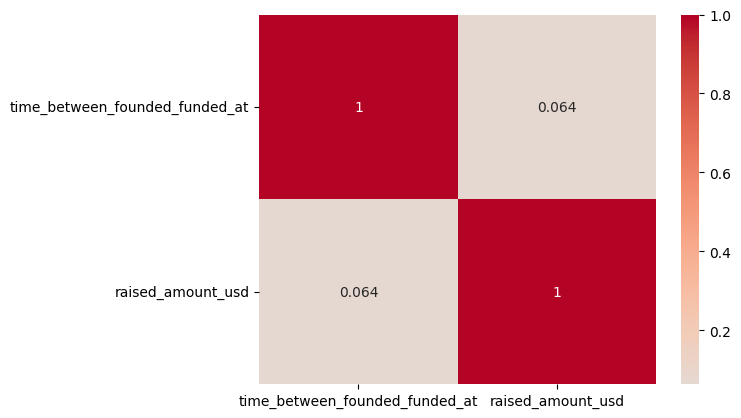

In [161]:
corr_matrix = data1[['time_between_founded_funded_at', 'raised_amount_usd']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

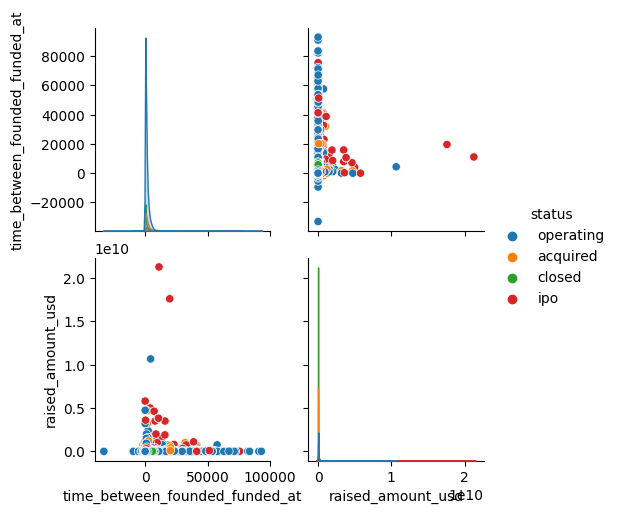

In [162]:
sns.pairplot(data1, vars=['time_between_founded_funded_at', 'raised_amount_usd'], hue='status')
plt.show()

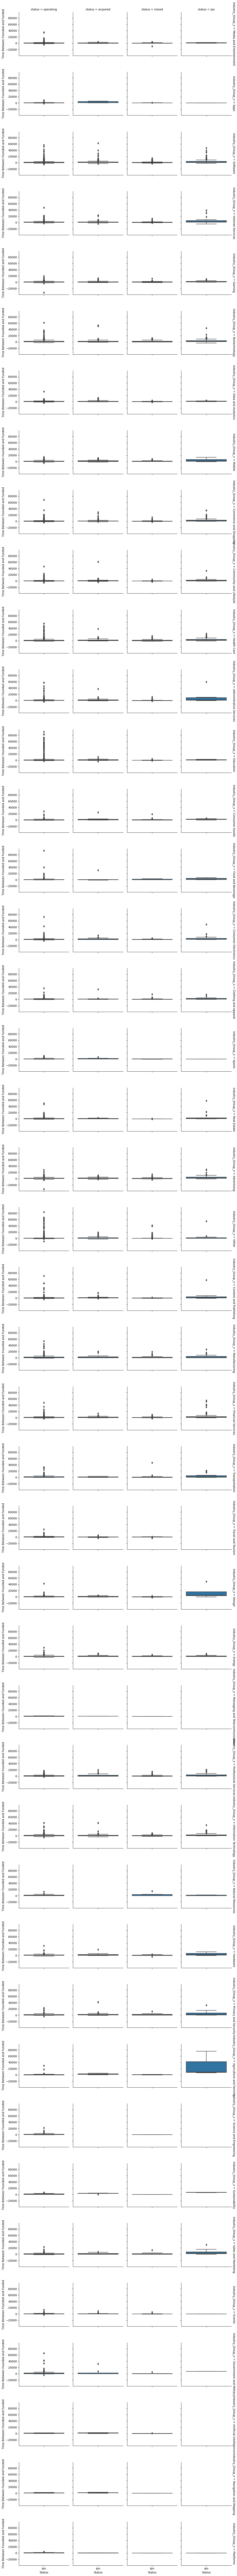

In [169]:
selected_columns = ['time_between_founded_funded_at', 'raised_amount_usd', 'status', 'Industry_Group_x']
selected_data = data1[selected_columns]

# Create a facet grid of box plots
g = sns.FacetGrid(selected_data, col='status', row='Industry_Group_x', margin_titles=True)
g.map_dataframe(sns.boxplot, x='status', y='time_between_founded_funded_at')
g.set_axis_labels("Status", "Time Between Founded and Funded")
plt.show()

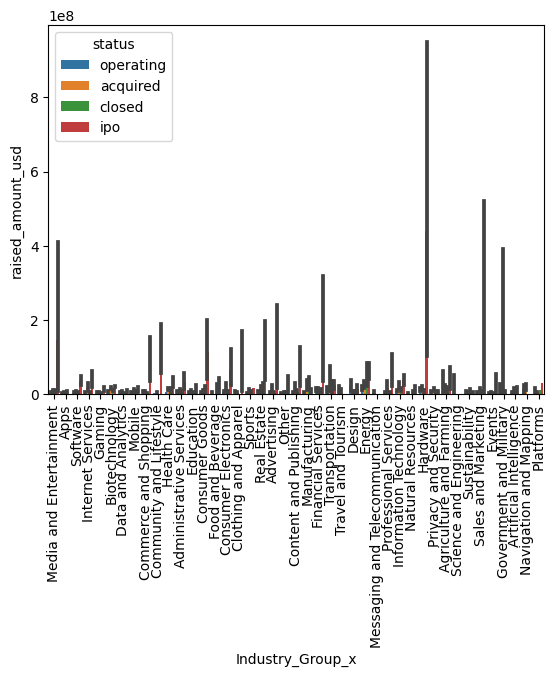

In [170]:
sns.barplot(x='Industry_Group_x', y='raised_amount_usd', hue='status', data=data1)
plt.xticks(rotation=90)
plt.show()

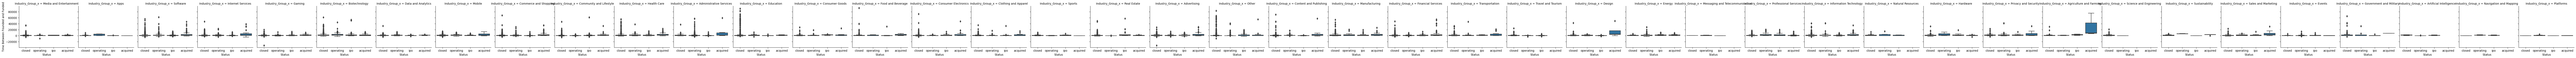

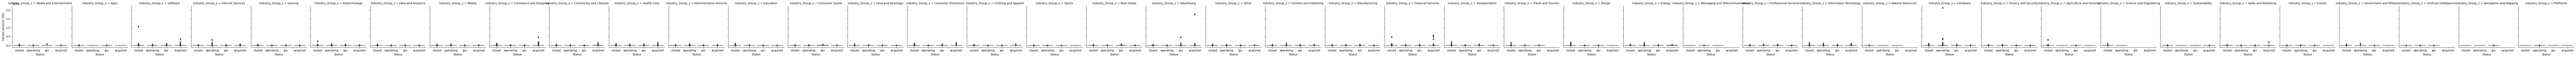

In [172]:
selected_columns = ['time_between_founded_funded_at', 'raised_amount_usd', 'status', 'Industry_Group_x']
selected_data = data1[selected_columns]

# Create box plots for each 'industry_type'
g = sns.FacetGrid(selected_data, col='Industry_Group_x', margin_titles=True)
g.map_dataframe(sns.boxplot, x='status', y='time_between_founded_funded_at')
g.set_axis_labels("Status", "Time Between Founded and Funded")
plt.show()

g = sns.FacetGrid(selected_data, col='Industry_Group_x', margin_titles=True)
g.map_dataframe(sns.boxplot, x='status', y='raised_amount_usd')
g.set_axis_labels("Status", "Raised Amount USD")
plt.show()

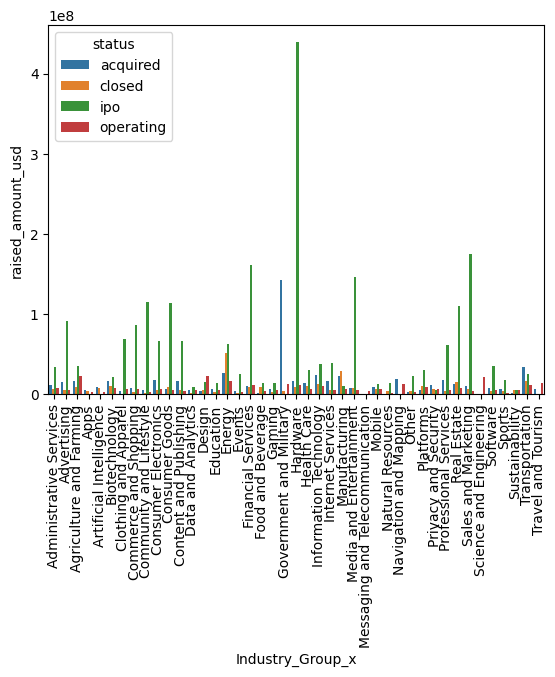

In [173]:
mean_raised_amount = data1.groupby(['Industry_Group_x', 'status'])['raised_amount_usd'].mean().reset_index()

# Create a bar plot
sns.barplot(x='Industry_Group_x', y='raised_amount_usd', hue='status', data=mean_raised_amount)
plt.xticks(rotation=90)
plt.show()

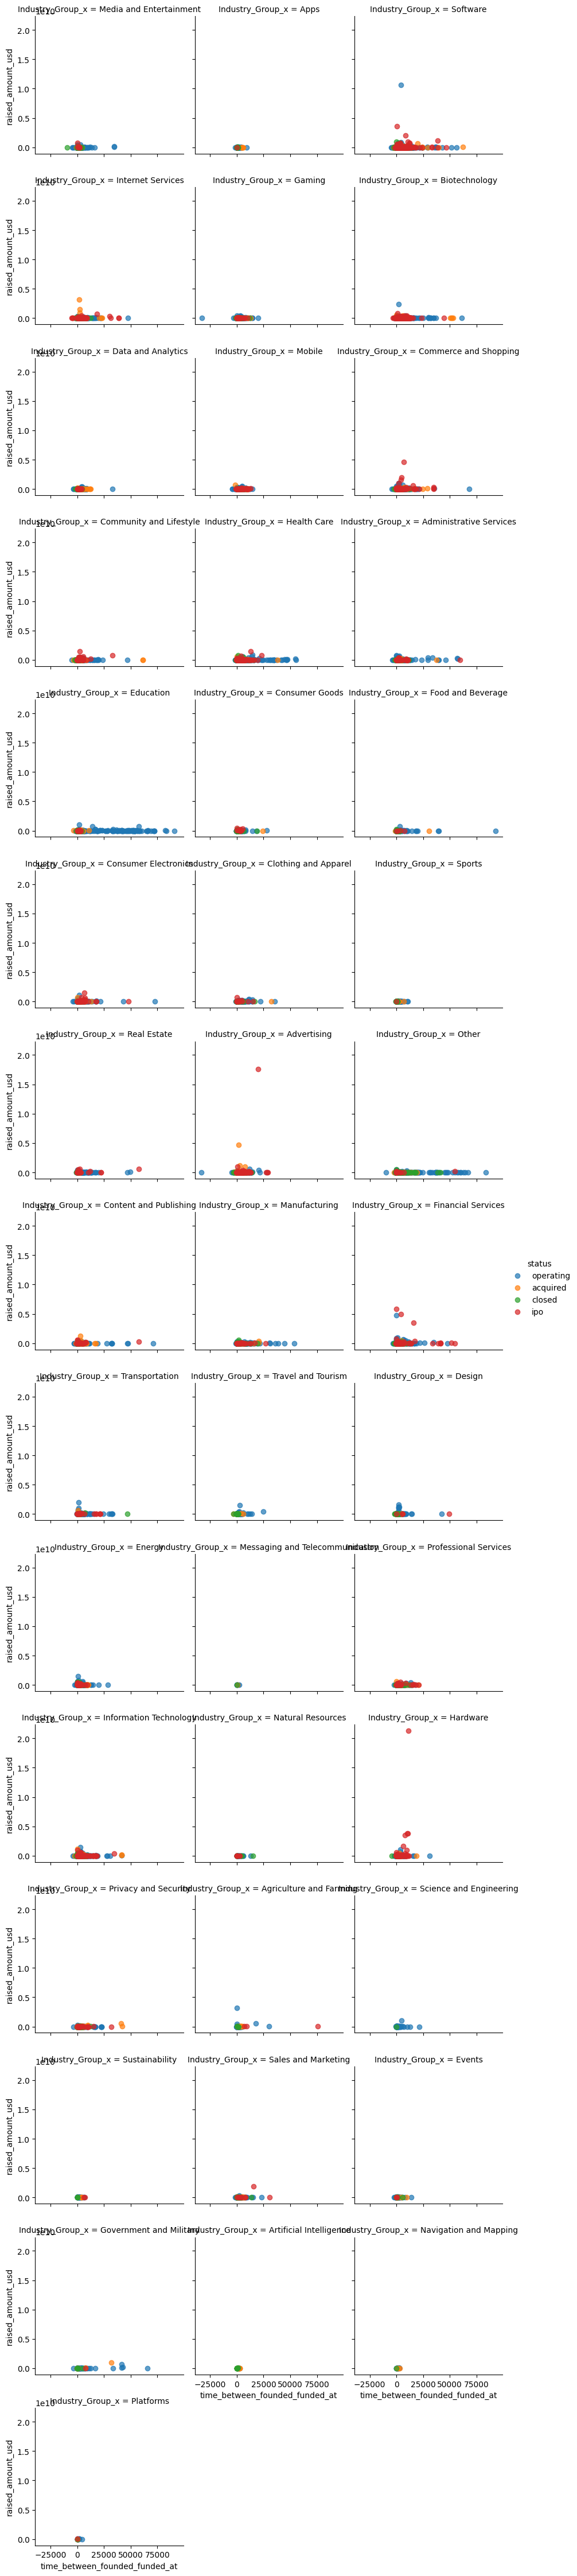

In [175]:
selected_columns = ['time_between_founded_funded_at', 'raised_amount_usd', 'status', 'Industry_Group_x']
selected_data = data1[selected_columns]

# Create a scatter plot with color-coded points
g = sns.FacetGrid(selected_data, col='Industry_Group_x', hue='status', col_wrap=3)
g.map(plt.scatter, 'time_between_founded_funded_at', 'raised_amount_usd', alpha=0.7)
g.add_legend()
plt.show()

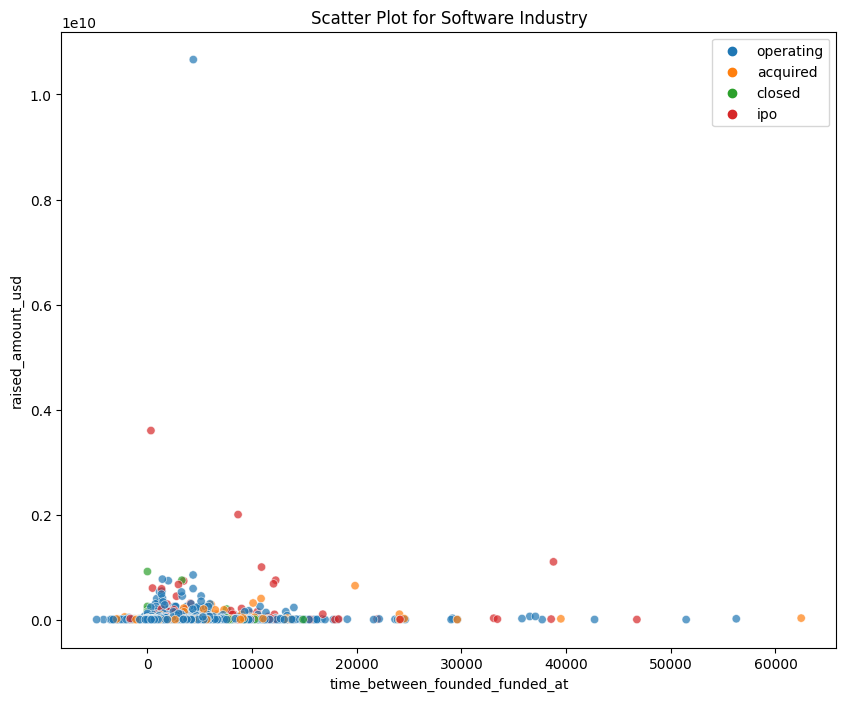

In [181]:
software_data = data1[data1['Industry_Group_x'] == 'Software']
plt.figure(figsize=(10, 8))


# Create a scatter plot with color-coded points
sns.scatterplot(x='time_between_founded_funded_at', y='raised_amount_usd', hue='status', data=software_data, alpha=0.7)
plt.legend()
plt.title('Scatter Plot for Software Industry')

plt.show()

KeyError: 'operating'

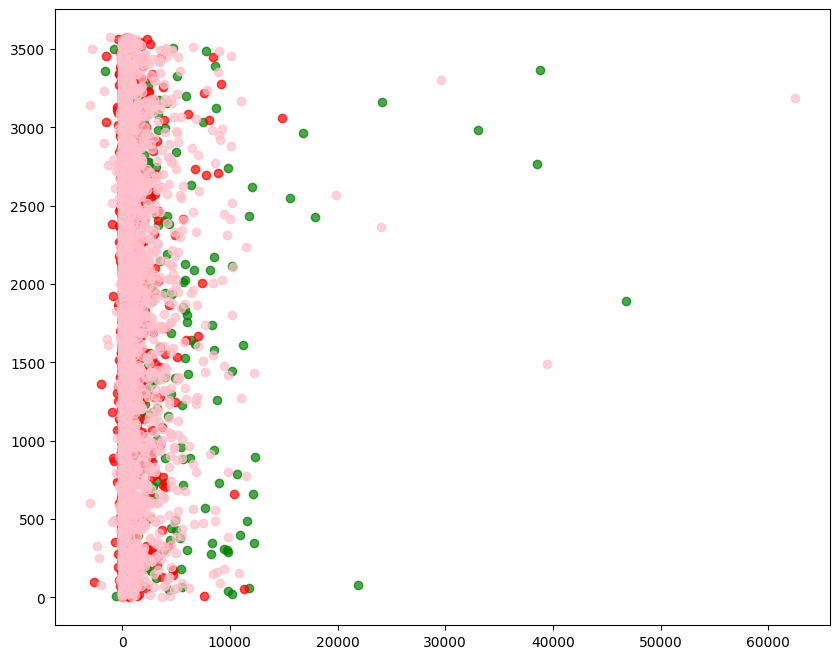

In [185]:

# Filter data for the "Software" industry
software_data = data1[data1['Industry_Group_x'] == 'Software']

# List of statuses to consider
statuses_to_include = ['ipo', 'closed', 'acquired']

# Filter data for companies with specified statuses in the "Software" industry
filtered_data = software_data[software_data['status'].isin(statuses_to_include)]

# Group data by company and calculate the minimum 'time_between_founded_funded_at' for each status
grouped_data = filtered_data.groupby(['company_name', 'status'])['time_between_founded_funded_at'].min().reset_index()

# Pivot the data to create separate columns for each status
pivoted_data = grouped_data.pivot(index='company_name', columns='status', values='time_between_founded_funded_at').reset_index()

# Filter companies with at least one of the specified statuses
filtered_companies = pivoted_data[pivoted_data[statuses_to_include].notnull().any(axis=1)]

# Set the figure size
plt.figure(figsize=(10, 8))

# Scatter plot for each status with color-coded points
plt.scatter(filtered_companies['ipo'], filtered_companies.index, color='green', label='IPO', alpha=0.7)
plt.scatter(filtered_companies['closed'], filtered_companies.index, color='red', label='Closed', alpha=0.7)
plt.scatter(filtered_companies['acquired'], filtered_companies.index, color='pink', label='Acquired', alpha=0.7)
plt.scatter(filtered_companies['operating'], filtered_companies.index, color='blue', label='Operating', alpha=0.7)

plt.legend()
plt.title('Scatter Plot for Software Companies with Specified Statuses')
plt.xlabel('Time Between Founded and Funded')
plt.ylabel('Company Index')

plt.show()







In [115]:
data1.groupby("company_name")["status"].count().sort_values()

company_name
#BratPackStyle, LLC.          1
Orpheus Media Research        1
Orpro Therapeutics            1
Orreco                        1
Orsto                         1
                             ..
Vocalocity                   17
Semprius                     18
Quellan                      18
Exagen Diagnostics           18
Solarflare Communications    19
Name: status, Length: 66071, dtype: int64

In [153]:
data1[data1["company_name"] == 'Solarflare Communications'].sort_values(by='funded_at', ascending=False)

company_permalink               company_name  \
92207  /organization/solarflare  Solarflare Communications   
92211  /organization/solarflare  Solarflare Communications   
92210  /organization/solarflare  Solarflare Communications   
92213  /organization/solarflare  Solarflare Communications   
92197  /organization/solarflare  Solarflare Communications   
92198  /organization/solarflare  Solarflare Communications   
92209  /organization/solarflare  Solarflare Communications   
92203  /organization/solarflare  Solarflare Communications   
92199  /organization/solarflare  Solarflare Communications   
92200  /organization/solarflare  Solarflare Communications   
92201  /organization/solarflare  Solarflare Communications   
92205  /organization/solarflare  Solarflare Communications   
92212  /organization/solarflare  Solarflare Communications   
92196  /organization/solarflare  Solarflare Communications   
92202  /organization/solarflare  Solarflare Communications   
92208  /organization/solarflare  Solarflare Communications   
92204  /organization/solarflare  Solarflare Communications   
92195  /organization/solarflare  Solarflare Communications   
92206  /organization/solarflare  Solarflare Communications   

      company_country_code funding_round_type funding_round_code  funded_at  \
92207                  USA            venture             NoCode 2015-01-05   
92211                  USA            venture             NoCode 2014-10-14   
92210                  USA     debt_financing             NoCode 2014-09-17   
92213                  USA     debt_financing             NoCode 2014-04-06   
92197                  USA            venture             NoCode 2014-04-06   
92198                  USA     debt_financing             NoCode 2013-11-12   
92209                  USA     debt_financing             NoCode 2013-09-16   
92203                  USA     debt_financing             NoCode 2013-05-17   
92199                  USA            venture             NoCode 2013-01-02   
92200                  USA     debt_financing             NoCode 2012-10-22   
92201                  USA     debt_financing             NoCode 2012-06-29   
92205                  USA            venture             NoCode 2011-05-27   
92212                  USA     debt_financing             NoCode 2010-12-01   
92196                  USA     debt_financing             NoCode 2010-10-21   
92202                  USA            venture             NoCode 2010-05-17   
92208                  USA     debt_financing             NoCode 2010-03-26   
92204                  USA            venture             NoCode 2008-12-28   
92195                  USA            venture             NoCode 2008-06-18   
92206                  USA            venture                  C 2005-02-28   

       raised_amount_usd Industry_Group_x     status  funding_rounds  \
92207         30137941.0         Software  operating              19   
92211          1100000.0         Software  operating              19   
92210            75000.0         Software  operating              19   
92213          2942719.0         Software  operating              19   
92197            40000.0         Software  operating              19   
92198          5000000.0         Software  operating              19   
92209          2500000.0         Software  operating              19   
92203          5000000.0         Software  operating              19   
92199         22022208.0         Software  operating              19   
92200          2500000.0         Software  operating              19   
92201         10000000.0         Software  operating              19   
92205         20488081.0         Software  operating              19   
92212          5000000.0         Software  operating              19   
92196          5000000.0         Software  operating              19   
92202         20142876.0         Software  operating              19   
92208          5000000.0         Softwar

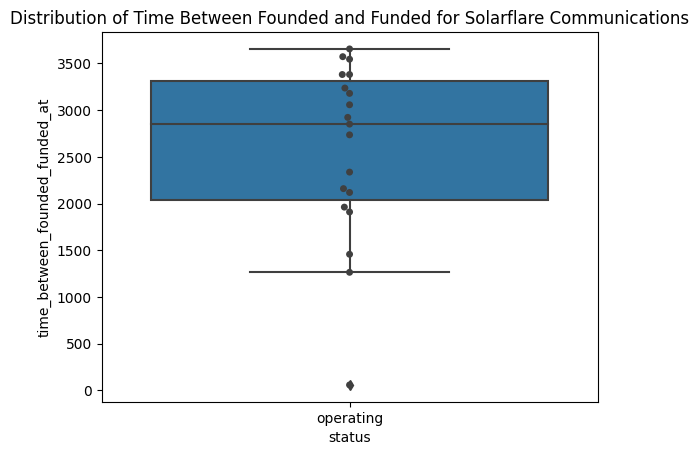

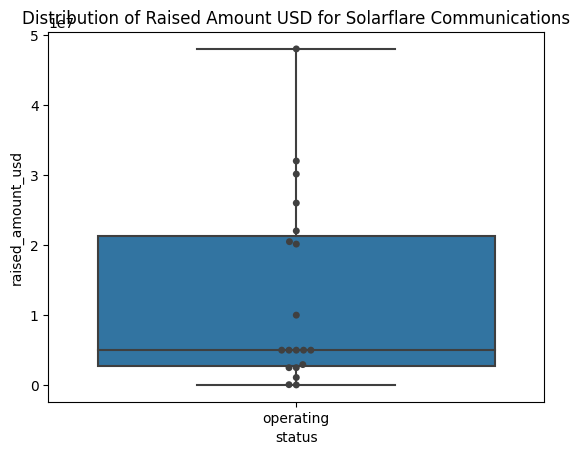

In [164]:
filtered_data = data1[data1["company_name"] == 'Solarflare Communications']

# Create box plot for 'time_between_founded_funded_at'
sns.boxplot(x='status', y='time_between_founded_funded_at', data=filtered_data)
sns.swarmplot(x='status', y='time_between_founded_funded_at', data=filtered_data, color=".25")
plt.title('Distribution of Time Between Founded and Funded for Solarflare Communications')
plt.show()

# Create box plot for 'raised_amount_usd'
sns.boxplot(x='status', y='raised_amount_usd', data=filtered_data)
sns.swarmplot(x='status', y='raised_amount_usd', data=filtered_data, color=".25")
plt.title('Distribution of Raised Amount USD for Solarflare Communications')
plt.show()

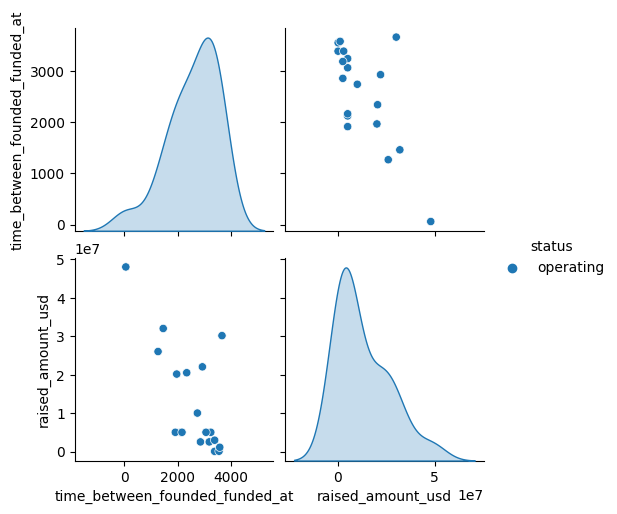

In [165]:
filtered_data = data1[data1["company_name"] == 'Solarflare Communications']

# Select relevant columns
selected_columns = ['time_between_founded_funded_at', 'raised_amount_usd', 'status']
filtered_data_selected = filtered_data[selected_columns]

# Create a pair plot
sns.pairplot(filtered_data_selected, hue='status')
plt.show()

In [160]:
data1.columns

Index(['company_permalink', 'company_name', 'company_country_code',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'Industry_Group_x', 'status', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'time_between_founded_funded_at'],
      dtype='object')

In [118]:
data1[data1["company_name"] == 'Solarflare Communications'].agg({'raised_amount_usd': ['sum', 'mean', 'max']})

raised_amount_usd
sum        2.429488e+08
mean       1.278678e+07
max        4.800000e+07

In [120]:
statuses = data1.groupby("company_name")["status"].nunique()

In [147]:
statuses[statuses > 1]

company_name
3DIVAZ      2
Adtena      2
Aptible     2
Archive     2
Ardian      2
           ..
Ventrix     2
Vessel      2
ViaCell     2
Wonder      2
Wormhole    2
Name: status, Length: 88, dtype: int64

In [138]:
rounds = data1.groupby("company_name")["funding_round_code"].nunique()
rounds

company_name
#BratPackStyle, LLC.         1
#HASHOFF                     1
#fame                        1
#waywire                     1
&TV Communications           1
                            ..
Ä°Å kutusu video ajansÄ±    1
Ðnso.fm                     1
âShwrÃ¼m                   1
âWestEd                    1
åç¥é©¬ ChiShenMa          1
Name: funding_round_code, Length: 66071, dtype: int64

In [142]:
#rounds[rounds > 0].count()
rounds[(rounds > 0) & (rounds == 1)].count()


54176

In [144]:
acquire = data1.groupby("company_name")["status"].nunique()
acquire

company_name
#BratPackStyle, LLC.         1
#HASHOFF                     1
#fame                        1
#waywire                     1
&TV Communications           1
                            ..
Ä°Å kutusu video ajansÄ±    1
Ðnso.fm                     1
âShwrÃ¼m                   1
âWestEd                    1
åç¥é©¬ ChiShenMa          1
Name: status, Length: 66071, dtype: int64

In [151]:
acquire[acquire > 1]

company_name
3DIVAZ      2
Adtena      2
Aptible     2
Archive     2
Ardian      2
           ..
Ventrix     2
Vessel      2
ViaCell     2
Wonder      2
Wormhole    2
Name: status, Length: 88, dtype: int64

In [129]:
data1[data1["company_name"] == 'picoChip']['funding_round_code'].value_counts()

NoCode    2
C         1
D         1
B         1
E         1
A         1
Name: funding_round_code, dtype: int64

In [122]:
data1[data1["company_name"] == '3DIVAZ']

company_permalink company_name company_country_code  \
477  /organization/3divaz-2       3DIVAZ                Other   
478  /organization/3divaz-3       3DIVAZ                  CHE   

    funding_round_type funding_round_code  funded_at  raised_amount_usd  \
477               seed             NoCode 2015-11-01           202250.0   
478               seed             NoCode 2015-11-01           202250.0   

    Industry_Group_x     status  funding_rounds founded_at first_funding_at  \
477            Other     closed               1 2014-07-01       2015-11-01   
478            Other  operating               1 2014-07-01       2015-11-01   

    last_funding_at  time_between_founded_funded_at  
477      2015-11-01                             488  
478      2015-11-01                             488

In [107]:
data1[data1['time_between_founded_funded_at'] < 0].groupby('funding_round_type').size()

funding_round_type
angel                     541
convertible_note           60
debt_financing             73
equity_crowdfunding       307
grant                     142
non_equity_assistance      11
post_ipo_equity             2
private_equity             33
product_crowdfunding       19
secondary_market            1
seed                     2112
undisclosed               152
venture                   765
dtype: int64

In [109]:
data1.nunique()

company_permalink                 66337
company_name                      66071
company_country_code                138
funding_round_type                   14
funding_round_code                    9
funded_at                          5033
raised_amount_usd                 22080
Industry_Group_x                     43
status                                4
funding_rounds                       19
founded_at                         4921
first_funding_at                   4814
last_funding_at                    4518
time_between_founded_funded_at     9185
dtype: int64

In [113]:
data1.groupby('company_country_code')['company_name'].nunique().sort_values(ascending=False)


company_country_code
USA      37473
Other     6944
GBR       3681
CAN       1925
IND       1596
         ...  
IRN          1
OMN          1
SOM          1
JEY          1
QAT          1
Name: company_name, Length: 138, dtype: int64

In [130]:
country = pd.read_csv('/Users/aamruth/Downloads/country.csv') # uploading dataset to map countyr code to continent
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how='any',axis=0) 
country.isnull().sum() # checking if there is null values

Continent_Name               0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [131]:
df1 = data1.merge(country, left_on='company_country_code', right_on='Three_Letter_Country_Code')
# merging both datasets and creating new column called continent
df1.columns

Index(['company_permalink', 'company_name', 'company_country_code',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'Industry_Group_x', 'status', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'time_between_founded_funded_at', 'Continent_Name',
       'Three_Letter_Country_Code', 'Country_Name'],
      dtype='object')

In [133]:
df1.groupby(by = ['Continent_Name'])['company_permalink'].count() #number of companies in each continent


Continent_Name
Africa             365
Asia              9852
Europe           17523
North America    75708
Oceania            920
South America     1708
Name: company_permalink, dtype: int64